* Calculation of numerical first derivative
* Comparison with analytical solution 
* Dependence of error on space increment

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

We initialize a space-dependent *sin* function

\begin{equation}
f(x)= \sin (k x)
\end{equation}

where the wavenumber k is

\begin{equation}
k = \dfrac{2 \pi}{\lambda}
\end{equation}

and $\lambda$ is wavelength.

In [5]:
xmax = 10.0                     # physical domain (m)
nx = 200                        # number of samples    
dx = xmax/(nx-1)                # grid increment dx (m)
x  = np.linspace(0,xmax,nx)     # space coordinates

# Initialization of sin function
l = 40*dx     # wavelength
k = 2*pi/l    # wavenumber
f = np.sin(k*x)
print('wave length is {} and wavenumber is {}'.format(l,k))

wave length is 2.0100502512562817 and wavenumber is 3.125884690321844


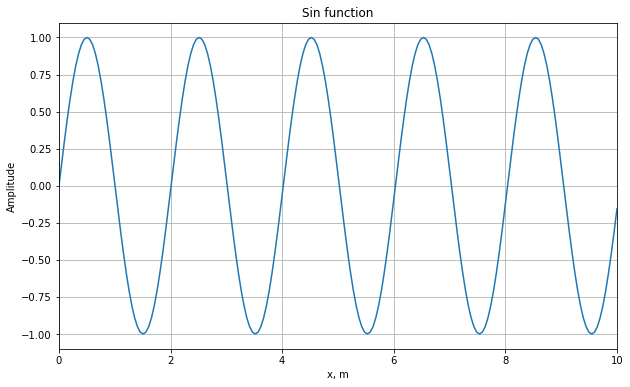

In [3]:
# Plot sin function
plt.figure(figsize=(10,6))
plt.plot(x, f)
plt.title('Sin function')
plt.xlabel('x, m')
plt.ylabel('Amplitude')
plt.xlim((0, xmax))
plt.grid()
plt.show()

In the cell below we calculate the central finite-difference derivative of f(x) using two points

\begin{equation} 
f^{\prime}(x)=\dfrac{f(x+dx)-f(x-dx)}{2dx}
\end{equation} 

and  compare with the analytical derivative

\begin{equation} 
f^{\prime}(x) = k \cos(k x)
\end{equation} 

In [6]:
# First derivative with two points

# Initiation of numerical and analytical derivatives 
nder=np.zeros(nx)          # numerical derivative
ader=np.zeros(nx)          # analytical derivative

# Numerical derivative of the given function
for i in range (1, nx-1):
    nder[i]=(f[i+1]-f[i-1])/(2*dx)

# Analytical derivative of the given function
ader= k * np.cos(k*x)   
# Exclude boundaries
ader[0]=0.
ader[nx-1]=0.

# Error (rms) 
rms = np.sqrt(np.mean((nder-ader)**2))

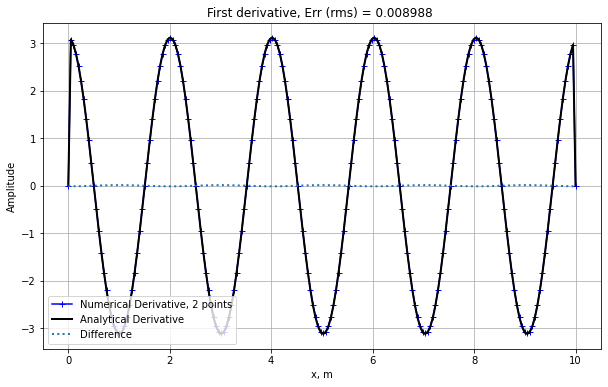

In [7]:
# Plotting 
# ----------------------------------------------------------------
plt.figure(figsize=(10,6))
plt.plot (x, nder,label="Numerical Derivative, 2 points", marker='+', color="blue")
plt.plot (x, ader, label="Analytical Derivative", lw=2, ls="-",color="black")
plt.plot (x, nder-ader, label="Difference", lw=2, ls=":")
plt.title("First derivative, Err (rms) = %.6f " % (rms) )
plt.xlabel('x, m')
plt.ylabel('Amplitude')
plt.legend(loc='lower left')
plt.grid()
plt.show()

#### The concept of number of points per wavelength

\begin{equation}
n_\lambda = \dfrac{\lambda}{dx}
\end{equation}

How does the error of the numerical derivative change with the number of points per wavelength?

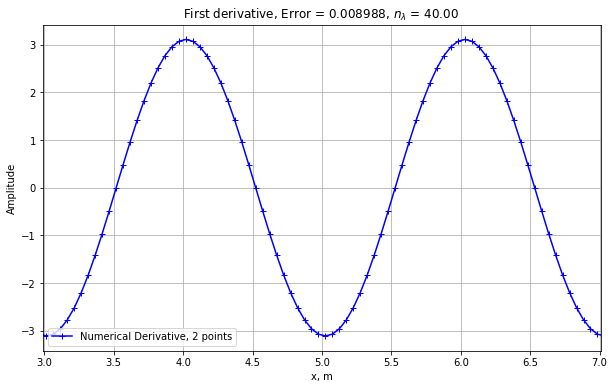

In [9]:
# Plotting number of points per wavelength
plt.figure(figsize=(10,6))
plt.plot (x, nder,label="Numerical Derivative, 2 points", marker='+', color="blue")
plt.title("First derivative, Error = %.6f, $n_\lambda$ = %.2f " % ( rms, l/dx) )
plt.xlabel('x, m')
plt.ylabel('Amplitude')
plt.legend(loc='lower left')
plt.xlim((xmax/2-l,xmax/2+l))
plt.grid()
plt.show()

#### Investigate the error as a function of grid points per wavelength

In [10]:
# Define a range of number of points per wavelength: [nmin=4,5,6 ... ,nmax=40]
# Loop over points, calculate corresponding wavelength and calculate error

# Initialize vectors
nmin=3
nmax=40
na =  np.zeros(nmax-nmin+1)    # Vector with number of points per wavelength
err = np.zeros(nmax-nmin+1)    # Vector with error

j = -1  # array index


# Loop through finite-difference derivative calculation
for n in range (nmin,nmax+1):
    
    j = j+1   # array index
    na[j] = n

    
    # Initialize sin function
    l = na[j]*dx  # wavelength
    k = 2*pi/l    # wavenumber
    f = np.sin(k*x)

    # Numerical derivative of the sin function
    for i in range (1, nx-1):
        nder[i]=(f[i+1]-f[i-1])/(2*dx)

    # Analytical derivative of the sin function
    ader= k * np.cos(k*x)   
    # Exclude boundaries
    ader[0]=0.
    ader[nx-1]=0.

    # Error (rms) 
    err[j] = np.sum((nder-ader)**2)/np.sum((ader**2)) * 100

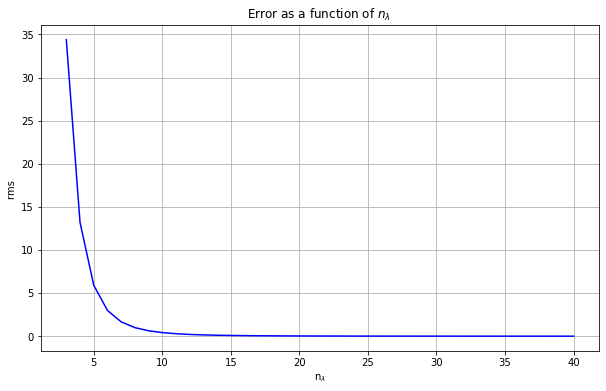

In [11]:
# ----------------------------------------------------------------
# Plotting error as function of number of points per wavelength
plt.figure(figsize=(10,6))
plt.plot(na,err, ls='-', color="blue")
plt.title('Error as a function of $n_\lambda$ ')
plt.xlabel('n$_\lambda$')
plt.ylabel('rms ')
plt.grid()
plt.show()

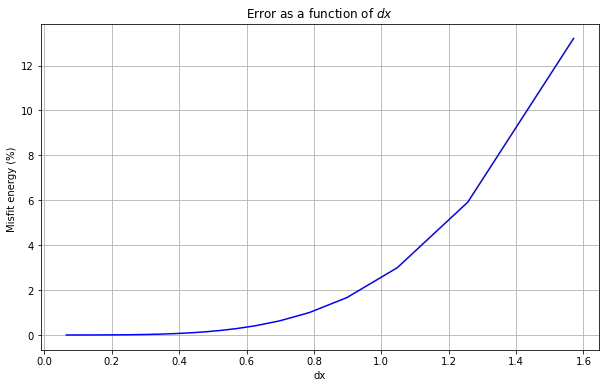

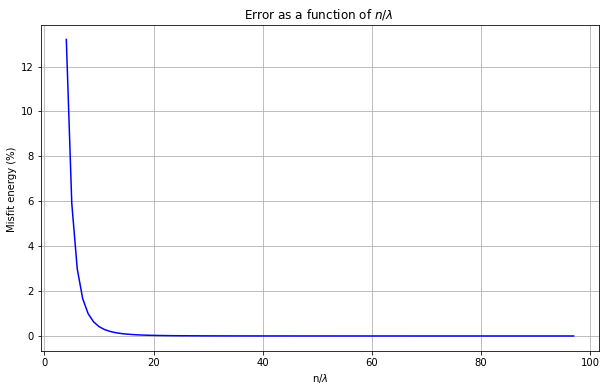

In [13]:
# Let us loop over number of points in the interval [5,100], 3 points corresponds to Nyquist wavelength

n1 =5
n2 =100
err = np.zeros(n2-n1-1)   # vector for error
dxa = np.zeros(n2-n1-1)   # vector for dx
npl = np.zeros(n2-n1-1)   # vector for number of points per lambda


ii = -1 

for n in range (n1,n2-1):
    ii   = ii + 1
    x    = np.linspace(0,2*np.pi,n)
    dx   = x[1]-x[0]
    f    = np.sin(x)
    df   = np.cos(x)     # Analytical derivative
    
    dfn = np.zeros(n)
    # Numerical derivative of the sin function
    for i in range (1, n-1):
        dfn[i]=(f[i+1]-f[i-1])/(2*dx)
    
    # Calculate error in the interval in which numerical derivative was calculated
    err[ii] = np.sum((df[1:n-1]-dfn[1:n-1])**2)/np.sum((df[1:n-1]**2)) * 100 
    
    dxa[ii] = dx         # dx
    npl[ii] = 2*np.pi/dx # number of points per wavelength
    

# ----------------------------------------------------------------
# Plotting error as function of dx
plt.figure(figsize=(10,6))
plt.plot(dxa,err, ls='-', color="blue")
plt.title('Error as a function of $dx$ ')
plt.xlabel('dx')
plt.ylabel('Misfit energy (%) ')
plt.grid()
plt.show()

# ----------------------------------------------------------------
# Plotting error as function of points per wavelength
plt.figure(figsize=(10,6))
plt.plot(npl,err, ls='-', color="blue")
plt.title('Error as a function of $n/\lambda$ ')
plt.xlabel('n/$\lambda$')
plt.ylabel('Misfit energy (%) ')
plt.grid()
plt.show()
    